In [1]:
import pandas as pd
import matplotlib.pyplot as plt


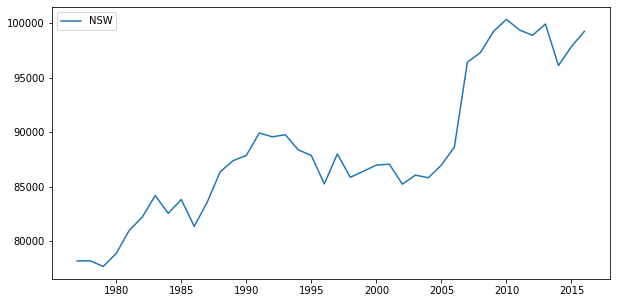

In [2]:
#A1 1
birth = pd.read_csv('Births.csv')
birth.head()
birth[['NSW','VIC']]
plt.figure(figsize=(10,5))
plt.plot(birth.Year, birth.NSW, label='NSW')
plt.legend(loc = 'best')
plt.show()

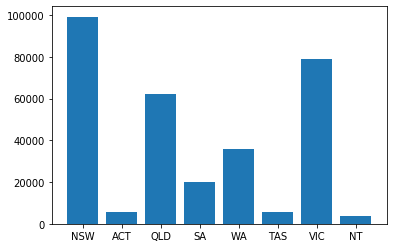

In [3]:
birth2016 = birth[birth.Year == 2016]
plt.figure()
plt.bar(birth2016.columns [1:], birth2016.iloc[0, 1:])
plt.show()



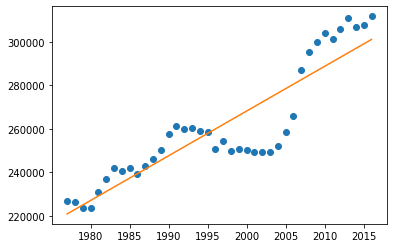

In [12]:
ausBirth = birth.loc [:,'NSW':].sum(axis=1)    #axis = 1 horizontal, axis = 0 vertical
#ausBirth

from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(birth.Year, ausBirth)
line = [slope*xi + intercept for xi in birth.Year]

plt.figure()
plt.plot(birth.Year, ausBirth, 'o', birth.Year, line)
plt.show()
         



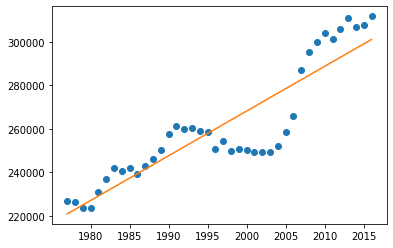

In [13]:
#Another method for question above tutor's own way

import numpy as np
coef = np.polyfit(birth.Year, ausBirth, 1)
line = np.poly1d(coef)

plt.figure()
plt.plot(birth.Year, ausBirth, 'o', birth.Year, line(birth.Year))
plt.show()



In [6]:
#A1. 2. d.

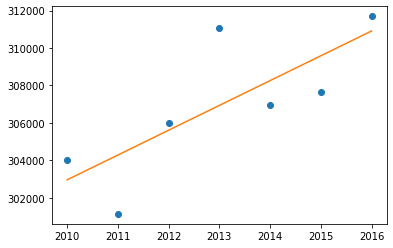

In [7]:
birth2010 = birth[birth.Year >= 2010]

coef = np.polyfit(birth2010.Year, ausBirth[-7:], 1)
line = np.poly1d(coef)
plt.figure()
plt.plot(birth2010.Year, ausBirth[-7:], 'o', birth2010.Year, line(birth2010.Year))
plt.show()

In [8]:
#A1 2 (e)

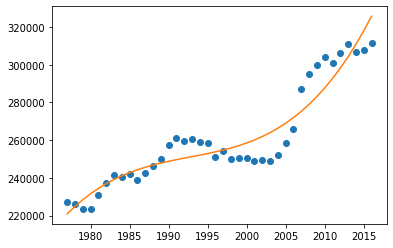

2050: 1137796    2100: 5872321


In [9]:
import numpy as np
coef = np.polyfit(birth.Year, ausBirth, 3)
line = np.poly1d(coef)

plt.figure()
plt.plot(birth.Year, ausBirth, 'o', birth.Year, line(birth.Year))
plt.show()

birth2050 = int(line(2050))
birth2100 = int(line(2100))
print('2050:',birth2050,'   2100:', birth2100)
#birth2050 = int(slope*2050 + intercept)
# birth2050 = slope*2050 + intercept #prediction of year 2050

In [10]:
#A1 3. a.

In [14]:
tfr = pd.read_csv('TFR.csv')
tfr.head()

tfr.QLD.min()
tfr.Year[tfr.QLD.idxmin()] #min data in which index? and use the index as input to find year
print("the min val of tfr in QLD is", tfr.QLD.min(), 'it happened in', tfr.Year[tfr.QLD.idxmin()])
############ second question
#print('NT is', tfr.NT[tfr.Year[tfr.QLD.idxmin()]]) ###Requires debug

the min val of tfr in QLD is 1.8 it happened in 1999


### Question A1. 4

   Year    NSW    VIC    QLD    SA    WA   TAS   NT  ACT
0  1977  42075  30067  16991  9715  7914  3227  715  786
1  1978  40121  29343  16353  9768  7781  3299  612  782
2  1979  39975  29523  16627  9748  7779  3318  586  759
3  1980  39799  28925  15774  9536  8078  3199  588  755
4  1981  39979  29144  17195  9806  8345  3494  671  795


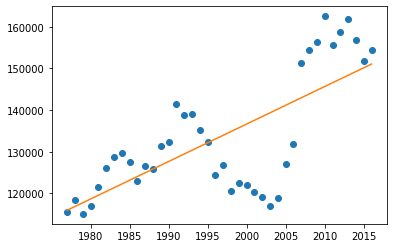

In [16]:
death = pd.read_csv('Deaths.csv')
print(death.head()) 
#natural grouwth = birth - death rate

ausDeath = death.iloc[:, 1:].sum(axis =1)
ausNG = ausBirth - ausDeath

coef = np.polyfit(death.Year, ausNG, 1)
line = np.poly1d(coef)

plt.figure()
plt.plot(death.Year, ausNG, 'o', death.Year, line(death.Year)) #O means the solid points/dots
plt.show()

### Question A2

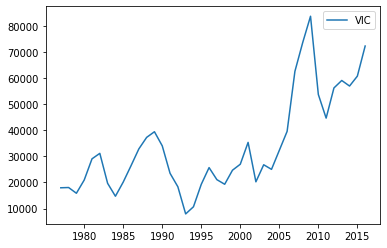

In [18]:
#1 a.
nom = pd.read_csv('NOM.csv')
nim = pd.read_csv('Datasets/Task A/NIM.csv')

plt.figure()
plt.plot(nom.Year, nom.VIC, label = 'VIC')
plt.legend() 
plt.show()


In [ ]:
#1 b.
ausNom = nom.iloc[:, 1:].sum(axis =1)
plt.figure()
plt.plot(nom.Year, ausNom)
plt.show()

#Research on policy on 2008 abnormal migration activity

In [ ]:
#2 a.
#Combine nom and nim into a table

meltedNom = nom.melt(id_vars ='Year', var_name ='States', value_name='NOM')
#print(meltedNom.head(100))
meltedNim = nim.melt(id_vars ='Year', var_name ='States', value_name='NIM')
combined = meltedNom.merge(meltedNim, on = ['Year', 'States'])
#print(combined.head(10))

print(combined.Year.max(),combined.Year.min() )

In [ ]:
#2 b. 

plt.figure()
plt.scatter(combined.NOM, combined.NIM)
plt.xlabel('NOM')
plt.ylabel('NIM')
plt.show()

In [ ]:
#2 c. 
combined1 = combined[combined.States =='VIC']


plt.figure()
plt.scatter(combined1.NOM, combined1.NIM)
plt.xlabel('NOM')
plt.ylabel('NIM')
plt.show()

In [ ]:
#Q2 d.
plt.figure()
plt.plot(nim.Year, nim.QLD, label = 'QLD')
plt.plot(nim.Year, nim.NSW, label = 'NSW')
plt.legend()
plt.show()

### Question A3

In [ ]:
meltedNom = nom.melt(id_vars ='Year', var_name ='States', value_name='NOM')
meltedNim = nim.melt(id_vars ='Year', var_name ='States', value_name='NIM')
meltedBirth = birth.melt(id_vars ='Year', var_name ='States', value_name='Birth')
meltedDeath = death.melt(id_vars ='Year', var_name ='States', value_name='Death')
meltedTfr = tfr.melt(id_vars ='Year', var_name ='States', value_name='Tfr')

combined = meltedNom.merge(meltedNim, on =['Year', 'States'])
combined = combined.merge(meltedBirth, on=['Year', 'States'])
combined = combined.merge(meltedDeath, on=['Year', 'States'])
combined = combined.merge(meltedTfr, on=['Year', 'States'])

totalGrowth = combined.Birth - combined.Death + combined.NOM + combined.NIM
combined['TotalGrowth'] = totalGrowth
print(combined.head())



### Question A3. 1

In [ ]:
from motionchart.motionchart import MotionChart

mchart = MotionChart(df = combined, key='Year', x='NOM', y='NIM', size='TotalGrowth', category='States')
mchart.to_notebook()

### A3 2.

In [ ]:
nom.Year[nom.VIC > nom.NSW]



In [ ]:
combined.States[combined.NIM.idxmax()]

### Task B

In [ ]:
#B1 1.
crime =pd.read_csv('Datasets/Task B/Crime_Statistics_SA_2014_2019.csv')
#print(crime.head())
a = crime.groupby(['Suburb - Incident', 'Reported Date'])['Offence Count'].sum()
b = a[ a>= 15]
c = b.groupby('Suburb - Incident').count()
print(c)

In [ ]:
#B1 2.
plt.figure()
plt.bar(c.index, c)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#B1 3. 

plt.figure()
plt.boxplot(c)
plt.show()

#remove outlier 
c.drop(index = 'ADELAIDE', inplace = True)

plt.figure()
plt.bar(c.index, c)
plt.xticks(rotation = 90)
plt.show()

#B2 
Three areas that night contain errors:
1. reported date might have error
2. postcode might not be following the correct format
3. Offence count (outliers eg: 1000 crime count per day (which is a rediculous number))

In [ ]:
pd.to_datetime(crime['Reported Date']) #check whether date contains error
#If successful converted, no error here

In [ ]:
crime['Postcode - Incident'].value_counts() #checks postcode error
#postcode not starting with 5 => not adelaide postcode
#With decimals

In [ ]:
#Inspect postcode problem
a = crime.groupby(['Postcode - Incident', 'Reported Date'])['Offence Count'].sum()
b = a[ a>= 15]
c = b.groupby('Postcode - Incident').count()
print(c)

In [ ]:
#How to fix the problem?

crime['Postcode - Incident'].replace('NOT DISCLOSED', '0', inplace = True)
crime['Postcode - Incident'].fillna('0', inplace = True) #fill the N/A
crime['Postcode - Incident'] = crime['Postcode - Incident'].astype('float').astype('int') #change the decimal ones into integers
crime['Postcode - Incident'][(crime['Postcode - Incident'] > 5000) & (crime['Postcode - Incident'] < 5999) | (crime['Postcode - Incident'] == 0)]

a = crime.groupby(['Postcode - Incident', 'Reported Date'])['Offence Count'].sum()
b = a[ a>= 15]
c = b.groupby('Postcode - Incident').count()
print(c)

plt.figure()
plt.bar(c.index.astype('str'), c)
plt.xticks(rotation = 90)
plt.show()

#boxplot
plt.figure()
plt.boxplot(c)
plt.show()